In [22]:
#Import top50.csv file
import pandas as pd
top50_df = pd.read_csv("top50.csv", encoding='latin-1')
top50_df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [23]:
import numpy as np
from pathlib import Path
from collections import Counter

In [28]:
#Remove uneccessary columns
top50_df.drop(['Unnamed: 0', 'Track.Name', 'Artist.Name'],  inplace=True, axis=1)
top50_df.head()

,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,dance pop,190,80,40,-4,16,70,186,12,46,85
3,pop,93,65,64,-8,8,55,198,12,19,86
4,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [29]:
#Get the dummies and store it in a variable
dummies = pd.get_dummies(top50_df.Genre)
#Concatenate the dummies to the original dataframe
top50final_df = pd.concat([top50_df, dummies], axis='columns')
#Drop the values
top50final_df.drop(['Genre'], inplace=True, axis='columns')
#Print new dataframe
top50final_df.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music
0,117,55,76,-6,8,75,191,4,3,79,...,0,0,0,0,0,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,92,...,0,0,0,0,0,0,0,0,1,0
2,190,80,40,-4,16,70,186,12,46,85,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,86,...,0,0,0,0,1,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,94,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Seperating Popular songs to >90 (Y) and <=89 (N (less popular))    
top50final_df['Pop Y/N'] = pd.Series(np.where(top50final_df.Popularity.values <= 89, 0, 1), top50final_df.index)
top50final_df.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,...,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Pop Y/N
0,117,55,76,-6,8,75,191,4,3,79,...,0,0,0,0,0,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,92,...,0,0,0,0,0,0,0,1,0,1
2,190,80,40,-4,16,70,186,12,46,85,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,86,...,0,0,0,1,0,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,94,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Drop 'Popularity' Column
top50final_df.drop("Popularity", axis=1, inplace=True)
top50final_df.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,atl hip hop,...,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Pop Y/N
0,117,55,76,-6,8,75,191,4,3,0,...,0,0,0,0,0,0,0,0,0,0
1,105,81,79,-4,8,61,302,8,9,0,...,0,0,0,0,0,0,0,1,0,1
2,190,80,40,-4,16,70,186,12,46,0,...,0,0,0,0,0,0,0,0,0,0
3,93,65,64,-8,8,55,198,12,19,0,...,0,0,0,1,0,0,0,0,0,0
4,150,65,58,-4,11,18,175,45,7,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#Create features
X = top50final_df.drop("Pop Y/N", axis=1)

y = top50final_df["Pop Y/N"]

X.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,atl hip hop,...,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,0.020000,...,0.040000,0.020000,0.100000,0.040000,0.14000,0.020000,0.020000,0.040000,0.040000,0.020000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,0.141421,...,0.197949,0.141421,0.303046,0.197949,0.35051,0.141421,0.141421,0.197949,0.197949,0.141421
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#balance of 'Pop Y/N' values
y.value_counts()

0    34
1    16
Name: Pop Y/N, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Naive Random Oversampling

In [82]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#View the Count
Counter(y_resampled)


Counter({1: 22, 0: 22})

In [83]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs", random_state =1)
model.fit(X_resampled, y_resampled)

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [84]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)

from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_test, y_pred))

0.7916666666666667


In [85]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7, 5],
       [0, 1]], dtype=int64)

In [86]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.58      1.00      0.74      0.76      0.56        12
          1       0.17      1.00      0.58      0.29      0.76      0.61         1

avg / total       0.94      0.62      0.97      0.70      0.76      0.56        13



# SMOTE Oversampling

In [89]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({1: 22, 0: 22})

In [90]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [91]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7916666666666667

In [92]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[7, 5],
       [0, 1]], dtype=int64)

In [93]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.58      1.00      0.74      0.76      0.56        12
          1       0.17      1.00      0.58      0.29      0.76      0.61         1

avg / total       0.94      0.62      0.97      0.70      0.76      0.56        13



# Undersampling


In [94]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 15, 1: 15})

In [95]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [96]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7083333333333334

In [97]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[5, 7],
       [0, 1]], dtype=int64)

In [98]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.42      1.00      0.59      0.65      0.39        12
          1       0.12      1.00      0.42      0.22      0.65      0.44         1

avg / total       0.93      0.46      0.96      0.56      0.65      0.40        13



# Combination (Over and Under) Sampling

In [99]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 12, 1: 19})

In [100]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [101]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.75

In [102]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[6, 6],
       [0, 1]], dtype=int64)

In [103]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.50      1.00      0.67      0.71      0.48        12
          1       0.14      1.00      0.50      0.25      0.71      0.53         1

avg / total       0.93      0.54      0.96      0.63      0.71      0.48        13



# Balanced Random Forest Classifier

In [12]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1) 
rf_model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [13]:
# Calculated the balanced accuracy score
y_pred = rf_model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.75


In [14]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[6, 6],
       [0, 1]], dtype=int64)

In [15]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.50      1.00      0.67      0.71      0.48        12
          1       0.14      1.00      0.50      0.25      0.71      0.53         1

avg / total       0.93      0.54      0.96      0.63      0.71      0.48        13



In [16]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(rf_model.feature_importances_, feature_names), reverse=True)

[(0.14420696562846638, 'Liveness'),
 (0.12514017047478196, 'Beats.Per.Minute'),
 (0.11091382512268234, 'Danceability'),
 (0.09885192459129948, 'Valence.'),
 (0.09299665062844344, 'Acousticness..'),
 (0.08952222490207237, 'Length.'),
 (0.08090617731448059, 'Energy'),
 (0.06666410515968542, 'Speechiness.'),
 (0.05506879811954927, 'Loudness..dB..'),
 (0.02689196049608101, 'pop'),
 (0.022419045405513434, 'dfw rap'),
 (0.02209508273361922, 'latin'),
 (0.01343753685790676, 'dance pop'),
 (0.008991144272394273, 'brostep'),
 (0.007741290854877809, 'canadian pop'),
 (0.006754348485192141, 'panamanian pop'),
 (0.004549762375532645, 'canadian hip hop'),
 (0.004198153475017511, 'electropop'),
 (0.003016037772867768, 'reggaeton'),
 (0.002754011086272116, 'country rap'),
 (0.00270660800552105, 'escape room'),
 (0.002360056975188554, 'reggaeton flow'),
 (0.0020742512847776004, 'pop house'),
 (0.0020058880859796183, 'edm'),
 (0.001970412141464775, 'atl hip hop'),
 (0.0016578628615393318, 'r&b en espan

# Easy Ensemble AdaBoost Classifier

In [17]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators = 100, random_state = 1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [18]:
# Calculated the balanced accuracy score
y_pred = eec.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7916666666666667


In [19]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[7, 5],
       [0, 1]], dtype=int64)

In [20]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.58      1.00      0.74      0.76      0.56        12
          1       0.17      1.00      0.58      0.29      0.76      0.61         1

avg / total       0.94      0.62      0.97      0.70      0.76      0.56        13



# Linear Regression

In [24]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

Intercept: 
 90.52245676282676
Coefficients: 
 [ 0.00955352  0.01491732  0.01313146  0.13022107  0.05644951 -0.07086021
 -0.01613894 -0.0092102   0.09322677]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.096
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.387
Time:                        20:26:34   Log-Likelihood:                -140.04
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      40   BIC:                             319.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t   

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


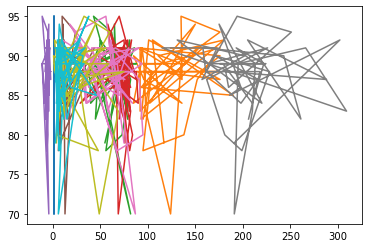

In [33]:
X = top50final_df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
                'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.'
                  ]]
Y = top50final_df['Popularity']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

plt.plot(X,Y)
plt.show()


Intercept: 
 85.35195830237465
Coefficients: 
 [ 0.03240466 -0.03261036 -0.00991898 -0.03289865  0.05923387]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.6432
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.668
Time:                        20:26:58   Log-Likelihood:                -143.79
No. Observations:                  50   AIC:                             299.6
Df Residuals:                      44   BIC:                             311.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


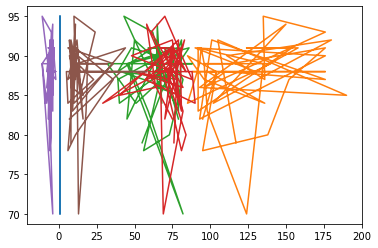

In [34]:
X = top50final_df[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
                'Liveness' 
                  ]]
Y = top50final_df['Popularity']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

plt.plot(X,Y)
plt.show()